In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/trending-youtube-videos-2019-to-2020/Trending Youtube Videos 2019 to 2020.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv('/kaggle/input/trending-youtube-videos-2019-to-2020/Trending Youtube Videos 2019 to 2020.csv')

In [5]:
df.head()

,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp
0,1,0GLbwkfhYZk,5722228,28229,185188,10860,2019-04-15 04:42:49
1,2,O4NB73HTlxI,3673770,31565,278477,4705,2019-04-15 04:42:50
2,3,VVRcXtSjPcE,253613,1025,4587,87,2019-04-15 04:42:51
3,4,adzYW5DZoWs,21567972,79208,478496,61703,2019-04-15 04:42:51
4,5,p_8yK2kmxoo,2385064,10703,133304,1323,2019-04-15 04:42:52


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541128 entries, 0 to 1541127
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   videostatsid  1541128 non-null  int64 
 1   ytvideoid     1541128 non-null  object
 2   views         1541128 non-null  int64 
 3   comments      1541128 non-null  int64 
 4   likes         1541128 non-null  int64 
 5   dislikes      1541128 non-null  int64 
 6   timestamp     1541128 non-null  object
dtypes: int64(5), object(2)
memory usage: 82.3+ MB


In [7]:
df.describe()

,videostatsid,views,comments,likes,dislikes
count,1.541128e+06,1.541128e+06,1.541128e+06,1.541128e+06,1.541128e+06
mean,7.705645e+05,2.334113e+06,1.062863e+04,1.140499e+05,4.600412e+03
std,4.448855e+05,4.739228e+06,4.690702e+04,2.811799e+05,7.602899e+04
min,1.000000e+00,3.969000e+03,0.000000e+00,1.040000e+02,6.000000e+00
25%,3.852828e+05,6.039978e+05,1.991000e+03,1.911500e+04,4.710000e+02
50%,7.705645e+05,1.092915e+06,4.037000e+03,4.295800e+04,1.024000e+03
75%,1.155846e+06,2.185136e+06,8.882000e+03,9.950500e+04,2.515000e+03
max,1.541128e+06,1.527469e+08,2.919587e+06,8.517540e+06,7.027836e+06


<Axes: >

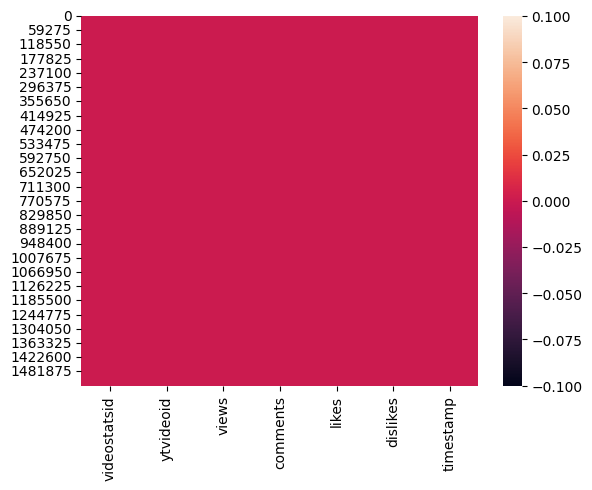

In [8]:
sns.heatmap(df.isnull())

In [9]:
# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
videostatsid             int64
ytvideoid               object
views                    int64
comments                 int64
likes                    int64
dislikes                 int64
timestamp       datetime64[ns]
dtype: object


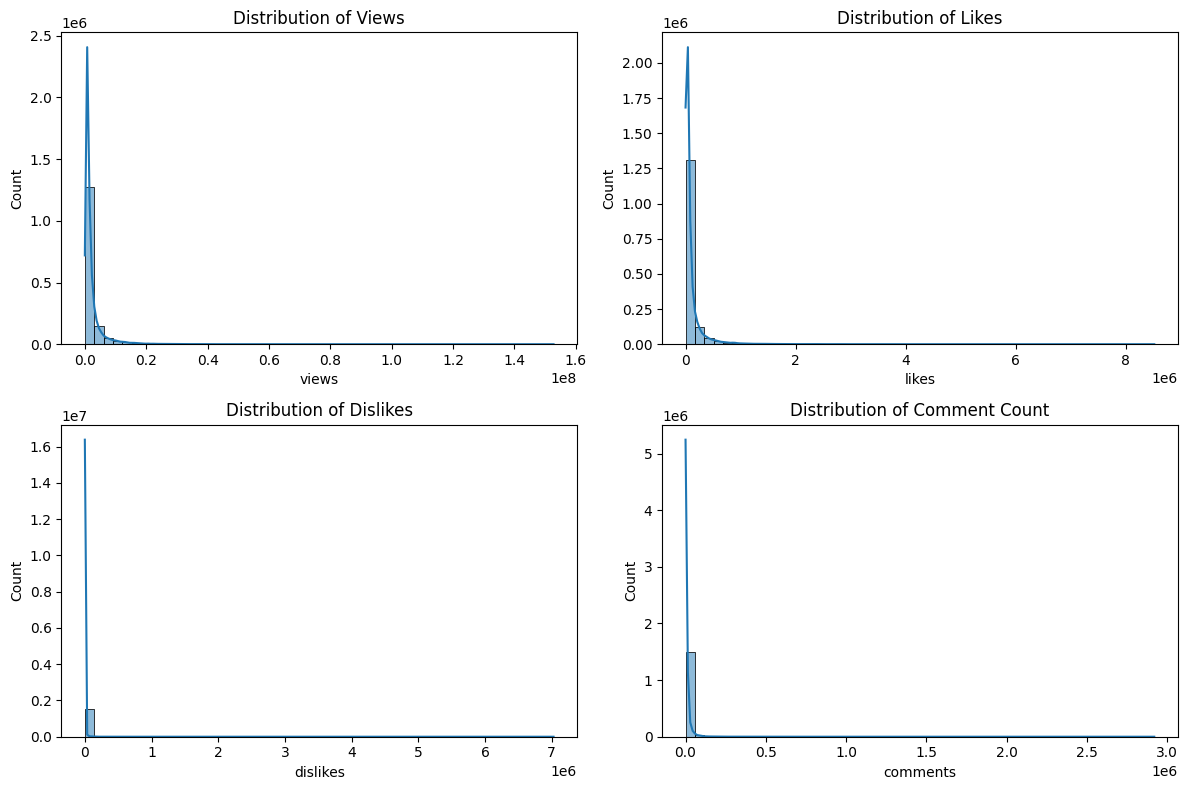

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sns.histplot(df['views'],bins=50, kde=True)
plt.title('Distribution of Views')

plt.subplot(2,2,2)
sns.histplot(df['likes'],bins=50, kde=True)
plt.title('Distribution of Likes')

plt.subplot(2,2,3)
sns.histplot(df['dislikes'],bins=50, kde=True)
plt.title('Distribution of Dislikes')

plt.subplot(2,2,4)
sns.histplot(df['comments'],bins=50, kde=True)
plt.title('Distribution of Comment Count')

plt.tight_layout()
plt.show()

In [11]:
df[df['likes']==df['likes'].max()]['ytvideoid']  #  video id with highest likes

22868    XsX3ATc3FbA
Name: ytvideoid, dtype: object

In [12]:
df[df['dislikes']==df['dislikes'].max()]['ytvideoid']   #  video id with highest dislikes

951638    2lAe1cqCOXo
Name: ytvideoid, dtype: object

In [13]:
df[df['comments']==df['comments'].max()]['ytvideoid']    #  video id with highest comments

22868    XsX3ATc3FbA
Name: ytvideoid, dtype: object

In [14]:
df[df['views']==df['views'].max()]['ytvideoid']          #  video id with highest views

22868    XsX3ATc3FbA
Name: ytvideoid, dtype: object

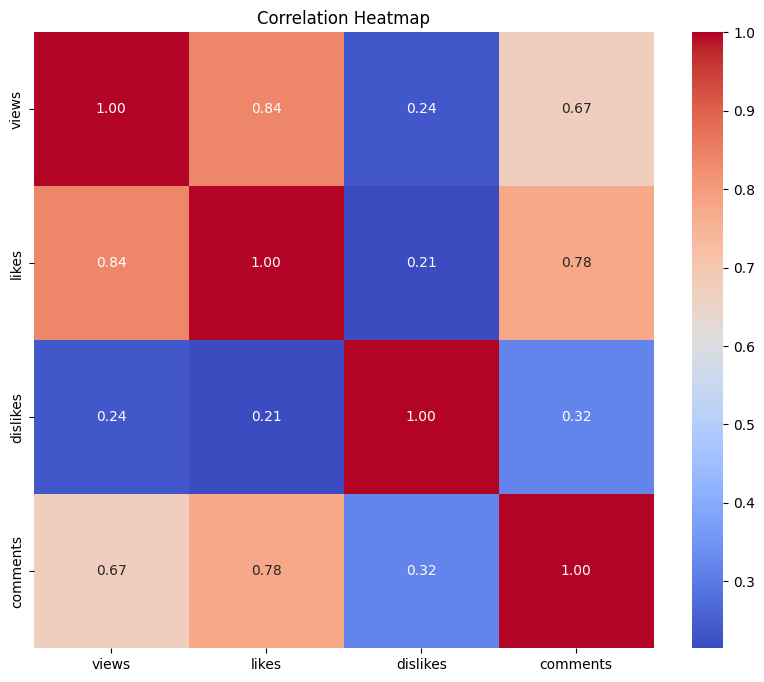

In [15]:
correlation_matrix = df[['views', 'likes', 'dislikes', 'comments']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

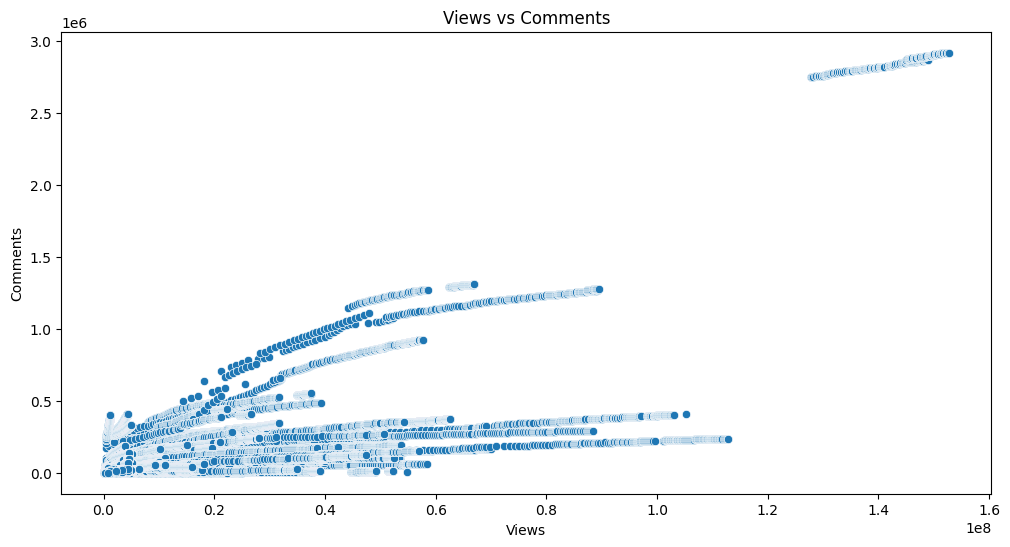

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='views', y='comments')
plt.title('Views vs Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.show()

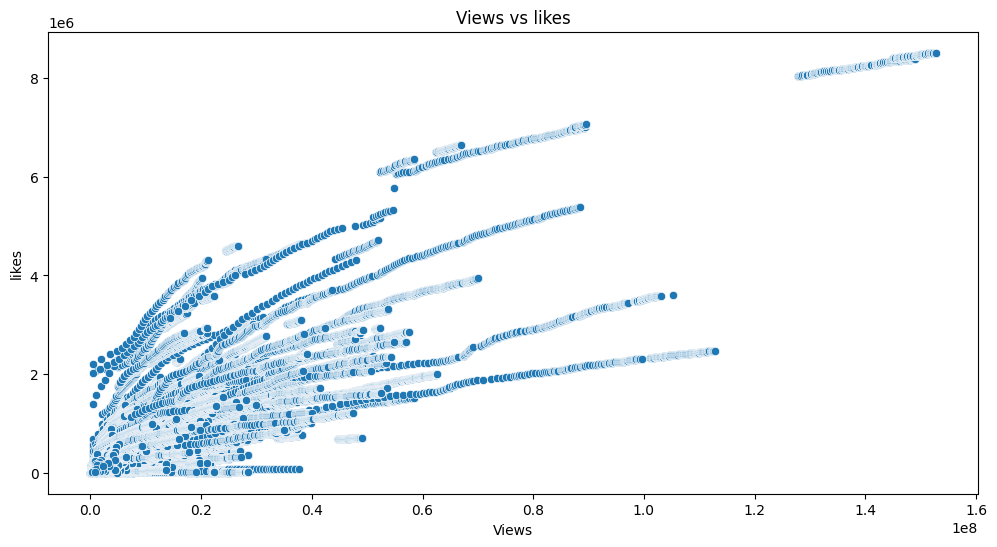

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='views', y='likes')
plt.title('Views vs likes')
plt.xlabel('Views')
plt.ylabel('likes')
plt.show()

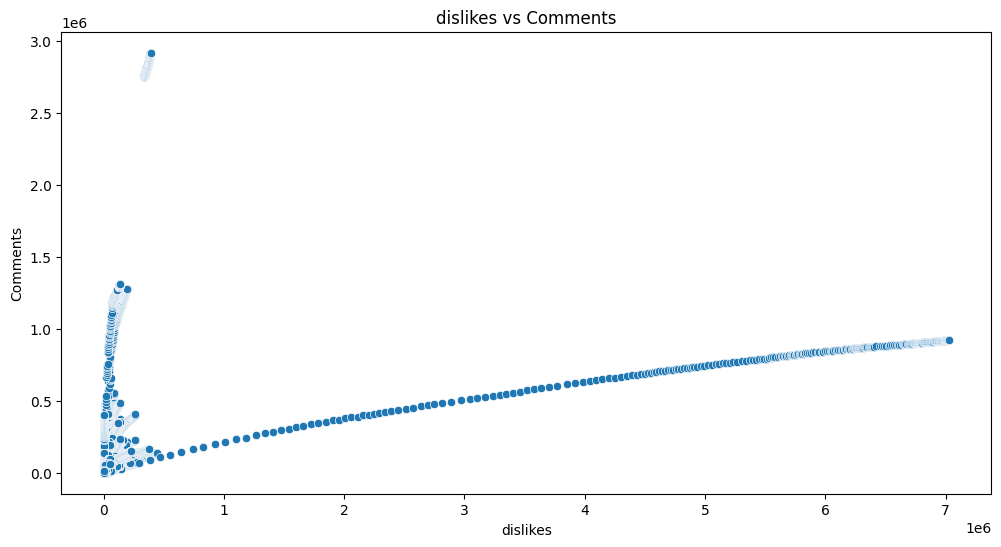

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='dislikes', y='comments')
plt.title('dislikes vs Comments')
plt.xlabel('dislikes')
plt.ylabel('Comments')
plt.show()

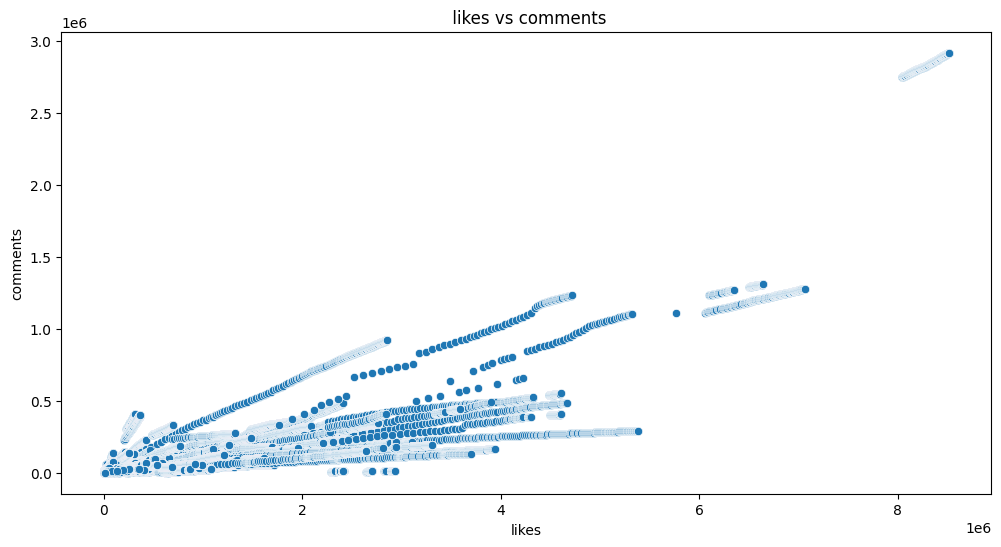

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='likes', y='comments')
plt.title(' likes vs comments')
plt.xlabel('likes')
plt.ylabel('comments')
plt.show()

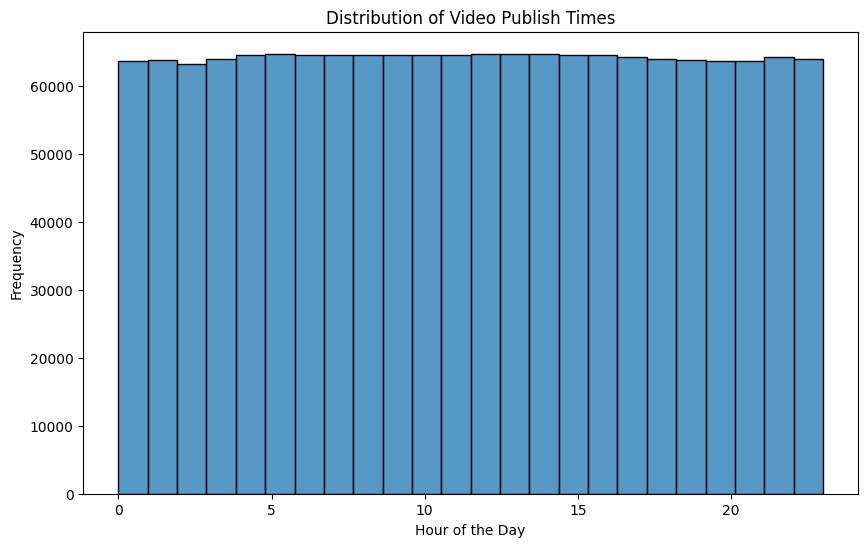

In [20]:
# Extract hour from timestamp for distribution analysis
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

# Plot distribution of video publish times
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Distribution of Video Publish Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

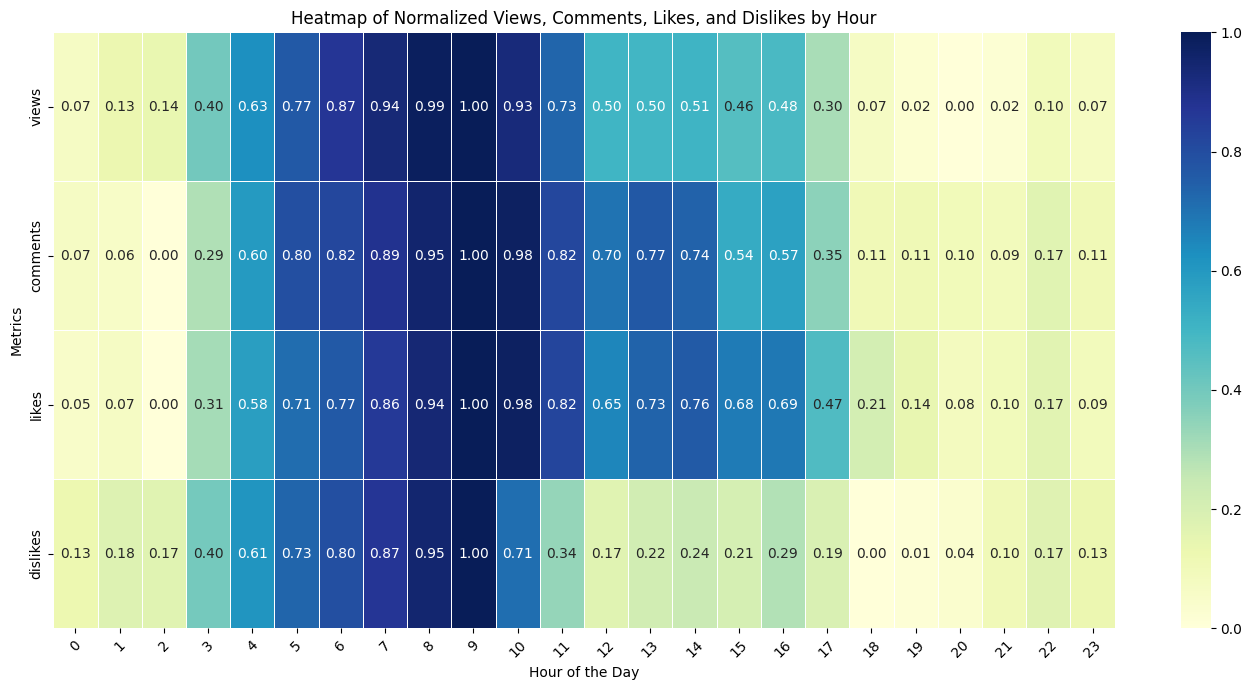

In [21]:
hourly_data = df.groupby('hour').agg({
    'views': 'sum',
    'comments': 'sum',
    'likes': 'sum',
    'dislikes': 'sum'
}).reset_index()

# Normalize data for better visual comparison
hourly_data_normalized = hourly_data.set_index('hour').apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Plot heatmap of normalized views, comments, likes, and dislikes by hour
plt.figure(figsize=(14, 7))
ax = sns.heatmap(hourly_data_normalized.T, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Normalized Views, Comments, Likes, and Dislikes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Metrics')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

observation:
- user activity increases from 5am to 11am
- from 6pm to 2am activity is least

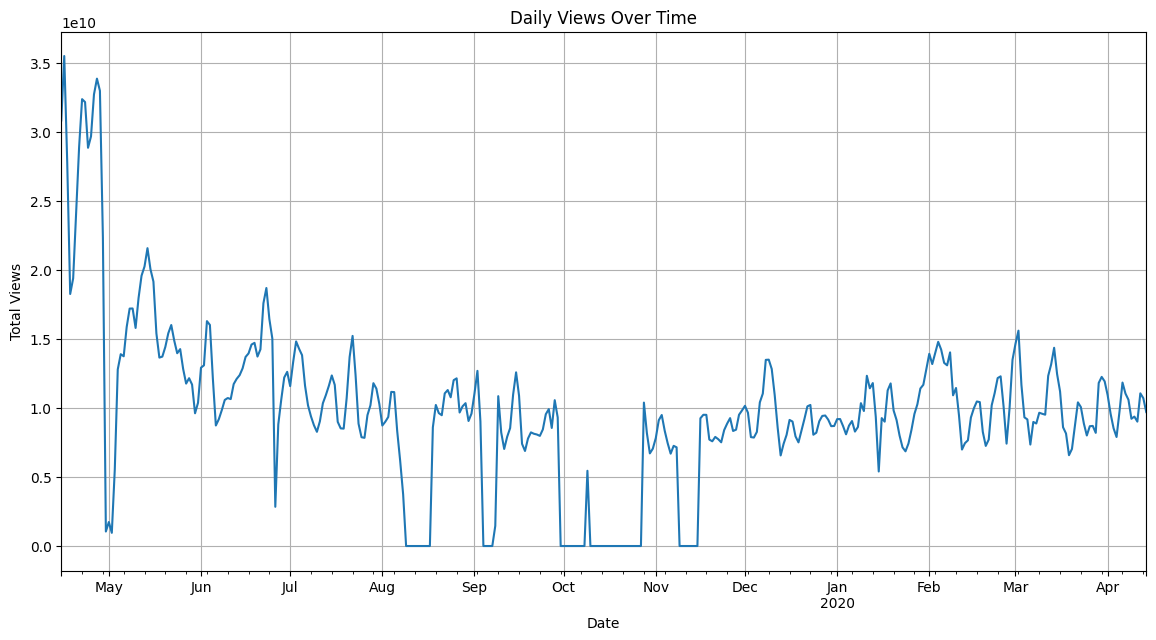

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Resample the data by day and sum the views
daily_views = df['views'].resample('D').sum()

# Plot the time series of views
plt.figure(figsize=(14, 7))
daily_views.plot()
plt.title('Daily Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.show()

**observation:**
- in the month of april views reach peak
- in the month of october views reach the least

**MACHINE LEARNING MODELS**

In [23]:
df.drop(columns=['ytvideoid'], inplace=True, axis=1)

In [24]:
df.head()

,videostatsid,views,comments,likes,dislikes,hour,day,month
timestamp,,,,,,,,
2019-04-15 04:42:49,1,5722228,28229,185188,10860,4,15,4
2019-04-15 04:42:50,2,3673770,31565,278477,4705,4,15,4
2019-04-15 04:42:51,3,253613,1025,4587,87,4,15,4
2019-04-15 04:42:51,4,21567972,79208,478496,61703,4,15,4
2019-04-15 04:42:52,5,2385064,10703,133304,1323,4,15,4


In [25]:
df.head()

,videostatsid,views,comments,likes,dislikes,hour,day,month
timestamp,,,,,,,,
2019-04-15 04:42:49,1,5722228,28229,185188,10860,4,15,4
2019-04-15 04:42:50,2,3673770,31565,278477,4705,4,15,4
2019-04-15 04:42:51,3,253613,1025,4587,87,4,15,4
2019-04-15 04:42:51,4,21567972,79208,478496,61703,4,15,4
2019-04-15 04:42:52,5,2385064,10703,133304,1323,4,15,4


In [26]:
df = df.dropna()

In [27]:

# df = df.drop(columns=['timestamp'], axis=1, inplace=True)

In [28]:
x = df.drop(columns=['views'], axis=1)

In [29]:
y = df['views']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
regression_models = {
    'Linear Regression': LinearRegression(),
    'K-nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
}

model_names = []
accuracies = []

Linear Regression R^2 score: 0.716884532235505
K-nearest Neighbors R^2 score: 0.9543182042482582
Decision Tree R^2 score: 0.9960651408050468


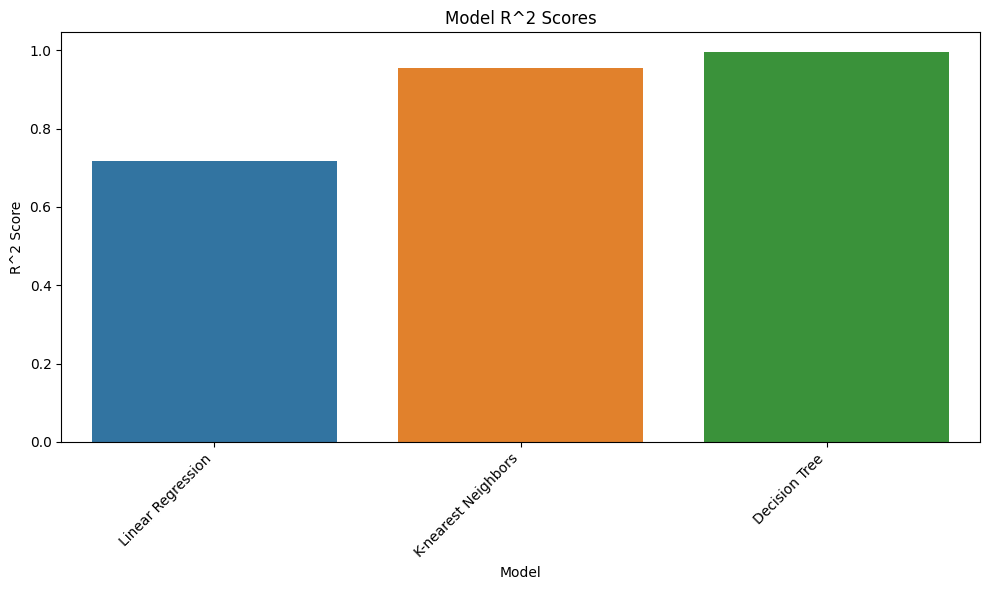

In [33]:
for name, model in regression_models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} R^2 score: {score}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'R^2 Score': accuracies})

# Plot model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2 Score', data=df_models)
plt.title('Model R^2 Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()

**observation:**
- From the above analysis the best model is Decision Tree with an accuracy of 99.61%

In [34]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = regression_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:}")

The best model is: Decision Tree with an accuracy of 0.9960651408050468


In [35]:
best_model.fit(x_train,y_train)
model_score = best_model.score(x_test,y_test)
y_pred = best_model.predict(x_test)

**Conclusion**

The project successfully analyzed user activity patterns and determined the peak and low activity periods. The findings reveal that user activity increases significantly from 5 AM to 11 AM, while it is least from 6 PM to 2 AM. Furthermore, the analysis of monthly views shows that April experiences the highest views, while October sees the least.

In terms of predictive modeling, the project explored various machine learning models to evaluate their effectiveness in analyzing the data. Among the models tested, the Decision Tree model emerged as the most effective, achieving an impressive accuracy of 99.61%. This high accuracy indicates the model's robustness and suitability for the data set used in this project.

Overall, the insights gained from the data analysis and the implementation of machine learning models provide valuable information for decision-making and highlight the potential for optimizing user engagement based on time patterns. Further work could explore additional features or data sources to enhance the model's accuracy and applicability in different contexts.